In [1]:
library(tidyr)
library(dplyr)
library(tidyverse)
library(data.table)
library(lubridate)
library(broom)
library(survival)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    betw

In [157]:
#UKB
x <- load("Users_Kun_Zhao_UKB_mCA_clean2.Rdata")
x

[1] "UKB_mCA_clean"

In [158]:
dim(UKB_mCA_clean)

[1] 502413     26

In [30]:
ltl_prs_ukb <- fread('Data_UKBioBank_prs_ltl_prs_yp09302024.tsv') 
cll_prs_ukb <- fread('Data_UKBioBank_prs_cll_prs_yp09302024.tsv') 

In [31]:
head(ltl_prs_ukb)
head(cll_prs_ukb)

IID,ltl_prs
<int>,<dbl>
-338,0.009331217
-337,-0.008085725
-336,-0.046034500
-335,-0.025729090
-334,-0.001564260
-333,-0.011310033


IID,cll_prs
<int>,<dbl>
-338,1.063146
-337,1.615900
-336,1.395654
-335,1.457313
-334,1.574994
-333,1.644956


In [32]:
UKB_mCA_clean$ID_VUMC <- as.integer(UKB_mCA_clean$ID_VUMC)

In [33]:
UKB_mCA_clean <- merge(UKB_mCA_clean,ltl_prs_ukb, by.x = "ID_VUMC", by.y = "IID",all.x = T)

In [34]:
UKB_mCA_clean <- merge(UKB_mCA_clean,cll_prs_ukb, by.x = "ID_VUMC", by.y = "IID",all.x = T)

In [35]:
summary(UKB_mCA_clean$cll_prs)
summary(UKB_mCA_clean$ltl_prs)
UKB_mCA_clean <- filter(UKB_mCA_clean, is.na(UKB_mCA_clean$cll_prs)==F)
UKB_mCA_clean <- filter(UKB_mCA_clean, is.na(UKB_mCA_clean$ltl_prs)==F)
summary(UKB_mCA_clean$cll_prs)
summary(UKB_mCA_clean$ltl_prs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.619   1.348   1.475   1.477   1.605   2.326   15342 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.091  -0.023  -0.011  -0.011   0.001   0.080   15342 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.619   1.348   1.475   1.477   1.605   2.326 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.090521 -0.022777 -0.011048 -0.010667  0.001019  0.080075 

In [36]:
UKB_mCA_clean$cll_262_coh <- 2
UKB_mCA_clean$cll_262_coh[UKB_mCA_clean$cll_prs >= quantile(UKB_mCA_clean$cll_prs,0.8)] <- 3
UKB_mCA_clean$cll_262_coh[UKB_mCA_clean$cll_prs < quantile(UKB_mCA_clean$cll_prs,0.2)] <- 1
UKB_mCA_clean$cll_262_coh<-as.factor(UKB_mCA_clean$cll_262_coh)
table(UKB_mCA_clean$cll_262_coh)


     1      2      3 
 97414 292242  97415 

In [37]:
UKB_mCA_clean$ltl_262_coh <- 2
UKB_mCA_clean$ltl_262_coh[UKB_mCA_clean$ltl_prs >= quantile(UKB_mCA_clean$ltl_prs,0.8)] <- 3
UKB_mCA_clean$ltl_262_coh[UKB_mCA_clean$ltl_prs < quantile(UKB_mCA_clean$ltl_prs,0.2)] <- 1
UKB_mCA_clean$ltl_262_coh<- as.factor(UKB_mCA_clean$ltl_262_coh)
table(UKB_mCA_clean$ltl_262_coh)


     1      2      3 
 97414 292242  97415 

In [41]:
table(UKB_mCA_clean$baseline_age)


   37    38    39    40    41    42    43    44    45    46    47    48    49 
    1     1     5  5277 10701 10775 11523 11799 12250 12293 12625 13059 13688 
   50    51    52    53    54    55    56    57    58    59    60    61    62 
13831 14565 14699 15223 15587 16345 16826 17228 18256 19320 23755 25303 24548 
   63    64    65    66    67    68    69    70    71    72    73 
22612 21802 21522 19600 17838 16335 15538  2334     3     3     1 

In [38]:
#Merge AoU
a <- load("data_all_pheno_cox_PhecodeX.Rdata")
a

[1] "data_all_pheno_cox"

In [39]:
data_ancestry <- fread('ancestry_preds.tsv') 

In [40]:
data_all_pheno_cox<- merge(data_all_pheno_cox,data_ancestry,by.x = "person_id", by.y = "research_id",all.x = T)
table(data_all_pheno_cox$ancestry_pred,useNA = "always")


   afr    amr    eas    eur    mid    sas   <NA> 
 56911  45034   5706 133578    942   3217  67537 

In [42]:
data_eur <- filter(data_all_pheno_cox , data_all_pheno_cox$ancestry_pred == "eur")

In [43]:
CLL_prs_aou <- fread('cll_pgs_v7_yp09182024.tsv') 
data_eur <- merge(data_eur,CLL_prs_aou,by.x = "person_id", by.y = "IID", all.x=T)
summary(data_eur$cll_prs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5294  1.1480  1.2701  1.2687  1.3913  1.9649 

In [44]:
data_all_pheno_cox2 <- filter(data_eur, is.na(data_eur$cll_prs)==F)

In [45]:
data_all_pheno_cox2 <- filter(data_all_pheno_cox2,data_all_pheno_cox2$age>=40 & data_all_pheno_cox2$age<=90)
summary(data_all_pheno_cox2$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   54.65   63.80   62.95   71.33   89.99 

In [46]:
table(data_all_pheno_cox2$chrom)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  265    54   253   192   245   218   177   105    98    37    64   205   171 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX 
   37    96   170   144   116    80    85    78   214  5611 

In [47]:
data_all_pheno_cox2$mca_auto <- data_all_pheno_cox2$mca_status
data_all_pheno_cox2$mca_auto <- ifelse(data_all_pheno_cox2$chrom == "chrX" & data_all_pheno_cox2$mca_status == "1" , 0 ,data_all_pheno_cox2$mca_auto)
table(data_all_pheno_cox2$mca_auto)
table(data_all_pheno_cox2$mca_status)


    0     1 
99699  3104 


    0     1 
94088  8715 

In [48]:
prs_LTL_aou <- fread('ltl_prs_v7_yp08282024.tsv') 
data_all_pheno_cox2 <- merge(data_all_pheno_cox2,prs_LTL_aou,by.x = "person_id", by.y = "IID", all.x=T)
summary(data_all_pheno_cox2$ltl_prs)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.006254  0.062548  0.073939  0.074255  0.085595  0.165163 

In [49]:
data_all_pheno_cox2$ltl_262_coh <- 2
data_all_pheno_cox2$ltl_262_coh[data_all_pheno_cox2$ltl_prs >= quantile(data_all_pheno_cox2$ltl_prs,0.8)] <- 3
data_all_pheno_cox2$ltl_262_coh[data_all_pheno_cox2$ltl_prs < quantile(data_all_pheno_cox2$ltl_prs,0.2)] <- 1
data_all_pheno_cox2$ltl_262_coh<-as.factor(data_all_pheno_cox2$ltl_262_coh)
table(data_all_pheno_cox2$ltl_262_coh)


    1     2     3 
20561 61681 20561 

In [50]:
data_all_pheno_cox2$cll_262_coh <- 2
data_all_pheno_cox2$cll_262_coh[data_all_pheno_cox2$cll_prs >= quantile(data_all_pheno_cox2$cll_prs,0.8)] <- 3
data_all_pheno_cox2$cll_262_coh[data_all_pheno_cox2$cll_prs < quantile(data_all_pheno_cox2$cll_prs,0.2)] <- 1
data_all_pheno_cox2$cll_262_coh <- as.factor(data_all_pheno_cox2$cll_262_coh)
table(data_all_pheno_cox2$cll_262_coh)


    1     2     3 
20560 61682 20561 

In [51]:
data_all_pheno_cox2$mca_auto <- data_all_pheno_cox2$mca_status
data_all_pheno_cox2$mca_auto <- ifelse(data_all_pheno_cox2$chrom == "chrX" & data_all_pheno_cox2$mca_status == "1" , 0 ,data_all_pheno_cox2$mca_auto)
table(data_all_pheno_cox2$mca_auto)
table(data_all_pheno_cox2$mca_status)


    0     1 
99699  3104 


    0     1 
94088  8715 

In [52]:
head(data_all_pheno_cox2)

,person_id,gender,date_of_birth,race,ethnicity,sex_at_birth,computed_gender,chrom,beg_GRCh38,end_GRCh38,⋯,lCH,ancestry_pred,probabilities,pca_features,ancestry_pred_other,cll_prs,mca_auto,ltl_prs,ltl_262_coh,cll_262_coh
,<dbl>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,1000004,Male,1940-06-15,White,Not Hispanic or Latino,Male,NA,NA,NA,NA,⋯,0,eur,"[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]","[0.10051663592874799, 0.1360249193403286, -0.006317042013381508, 0.05224893088407148, 0.003264557482538397, 0.0163363587430276, 0.01602793629214028, -0.0021481362244359097, -0.001438666033873317, 0.0010070149017609809, 0.0014280909874970116, -0.0005128583327644807, 5.042906140389694e-05, -0.0006639144676124135, 0.0008590882820919863, -0.0013159666185546246]",eur,1.269121,0,0.07003842,2,2
2,1000033,Male,1956-06-15,White,Not Hispanic or Latino,Male,NA,NA,NA,NA,⋯,0,eur,"[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]","[0.09828612276613305, 0.12465899985829886, -0.009625498441304989, 0.04319221866281957, 0.0034809501846149436, 0.020772217965413384, 0.022587866667172732, -0.0025827653590480178, -0.0013463895998797055, 6.18717109006189e-05, -0.00013721587795482277, 0.0004617272349225212, 0.00048178264959625617, 0.0007051463209457688, 0.0006071772416190404, 0.0008175721775497601]",eur,1.046595,0,0.05900267,1,1
3,1000059,Female,1957-06-15,White,Not Hispanic or Latino,Female,NA,NA,NA,NA,⋯,0,eur,"[0.0, 0.01, 0.13, 0.86, 0.0, 0.0]","[0.101364060653216, 0.1291766049697805, -0.003487352584485684, 0.04234351678089891, 0.0016333807427006848, 0.013105682515860003, 0.01422169472775189, -0.0023217384830628747, -0.00035961826126234403, -0.0004943597794948009, 0.0002244860950533817, -0.0020885470549639493, 0.0008466217968905725, -0.0003232616222189869, 0.000462540878276781, -0.00031009614787747556]",eur,1.514081,0,0.05709059,1,3
4,1000061,Male,1964-06-15,White,Not Hispanic or Latino,Male,NA,NA,NA,NA,⋯,0,eur,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.10085760470722085, 0.13344686833215572, -0.01247018031651587, 0.04666732504335144, 0.00253850443697011, 0.01945622075411456, 0.02179766576627512, -0.004583230443745745, -0.0018777295357035495, 9.14961421253301e-05, -0.0005869645657689797, -0.00029594633893824374, -7.698801346495772e-05, -0.0009725585218240581, 4.105784101860854e-05, -0.0019297644268820905]",eur,1.299118,0,0.06786092,2,2
5,1000070,Female,1947-06-15,White,Not Hispanic or Latino,NA,NA,NA,NA,NA,⋯,0,eur,"[0.0, 0.0, 0.01, 0.99, 0.0, 0.0]","[0.1010393263147634, 0.13358428512510742, -0.011063043591677132, 0.04712044950944926, 0.002319504693865122, 0.01922752410608919, 0.022216058958466, -0.003748165502300085, -0.0025657521254363975, 1.3865934200874865e-06, -0.00021020949498413955, -0.0013742019641753177, -0.00018772228821021888, -0.0005185590865910027, 0.0017962880610356221, 7.307403413525868e-05]",eur,1.299154,0,0.06656039,2,2
6,1000091,Female,1954-06-15,White,Not Hispanic or Latino,Female,NA,NA,NA,NA,⋯,0,eur,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.10106103916383959, 0.1268855692951698, -0.010065741011502836, 0.045756588796433906, 0.0020057961865087128, 0.02550286165517666, 0.033920178430476705, -0.006515419713601444, -0.002493741254014306, -0.0016770435748865204, -0.0006727931152468894, -0.0014279802722304115, 0.000514895662989922, -0.000389921191596582, 3.663271568375134e-05, 0.0005116756058204766]",eur,1.322771,0,0.05297797,1,2


In [53]:
AoU_mCA_clean <- data_all_pheno_cox2[,c("person_id", "age", "age_squ", "sex_at_birth", "smoking", "cll_prs", "ltl_prs",
                                       "cll_262_coh", "ltl_262_coh", "mca_auto", "cf_cat", "cf_max","chrom", "mca_highrisk",
                                       "p_arm","q_arm","type","cll")]

In [54]:
ls(UKB_mCA_clean)

[1] "age2"         "baseline_age" "cf_cat"       "cf_max"       "chrom"       
 [6] "cll"          "cll_262_coh"  "cll_prs"      "eversmoked_0" "genetic_sex" 
[11] "ID_VUMC"      "ltl_262_coh"  "ltl_prs"      "mca_highrisk" "mca_status"  
[16] "p_arm"        "PC1"          "PC10"         "PC2"          "PC3"         
[21] "PC5"          "PC6"          "PC7"          "PC8"          "PC9"         
[26] "PCD4"         "q_arm"        "smoking_0"    "survial_cll"  "type"

In [55]:
UKB_mCA_clean2 <- UKB_mCA_clean[,c("ID_VUMC", "baseline_age", "age2", "genetic_sex","eversmoked_0","cll_prs", "ltl_prs",
                                 "cll_262_coh", "ltl_262_coh", "mca_status", "cf_cat", "cf_max","chrom", "mca_highrisk",
                                 "p_arm","q_arm","type","cll")]

In [56]:
names(UKB_mCA_clean2)[1] <- "person_id"
names(UKB_mCA_clean2)[2] <- "age"
names(UKB_mCA_clean2)[3] <- "age_squ"
names(UKB_mCA_clean2)[4] <- "sex_at_birth"
names(UKB_mCA_clean2)[5] <- "smoking"
names(UKB_mCA_clean2)[10] <- "mca_auto"

In [57]:
ls(UKB_mCA_clean2)
ls(AoU_mCA_clean)

[1] "age"          "age_squ"      "cf_cat"       "cf_max"       "chrom"       
 [6] "cll"          "cll_262_coh"  "cll_prs"      "ltl_262_coh"  "ltl_prs"     
[11] "mca_auto"     "mca_highrisk" "p_arm"        "person_id"    "q_arm"       
[16] "sex_at_birth" "smoking"      "type"

[1] "age"          "age_squ"      "cf_cat"       "cf_max"       "chrom"       
 [6] "cll"          "cll_262_coh"  "cll_prs"      "ltl_262_coh"  "ltl_prs"     
[11] "mca_auto"     "mca_highrisk" "p_arm"        "person_id"    "q_arm"       
[16] "sex_at_birth" "smoking"      "type"

In [58]:
table(UKB_mCA_clean2$sex_at_birth, useNA = 'always')
table(AoU_mCA_clean$sex_at_birth, useNA = 'always')

table(UKB_mCA_clean2$smoking, useNA = 'always')
table(AoU_mCA_clean$smoking, useNA = 'always')


     0      1   <NA> 
264166 222905      0 


  Female Intersex     Male     <NA> 
   58368       15    42147     2273 


     0      1   <NA> 
194649 289981   2441 


            No PMI: Dont Know            Yes           <NA> 
         54860            997          45584           1362 

In [59]:
UKB_mCA_clean2$sex_at_birth <- ifelse(UKB_mCA_clean2$sex_at_birth == 1, "Male", "Female")
table(UKB_mCA_clean2$sex_at_birth)

UKB_mCA_clean2$smoking <- ifelse(UKB_mCA_clean2$smoking == 1, "Yes", "No")
table(UKB_mCA_clean2$smoking)


Female   Male 
264166 222905 


    No    Yes 
194649 289981 

In [60]:
table(UKB_mCA_clean2$cf_cat, useNA = "always")
table(UKB_mCA_clean2$mca_highrisk, useNA = "always")
UKB_mCA_clean2$cf_cat <- ifelse(is.na(UKB_mCA_clean2$cf_cat),0,UKB_mCA_clean2$cf_cat)
UKB_mCA_clean2$mca_highrisk <- ifelse(is.na(UKB_mCA_clean2$mca_highrisk),0,UKB_mCA_clean2$mca_highrisk)
table(UKB_mCA_clean2$cf_cat, useNA = "always")
table(UKB_mCA_clean2$mca_highrisk, useNA = "always")


     0      1      2   <NA> 
472527  10358   4186      0 


     0      1      2   <NA> 
472009   1906  13156      0 


     0      1      2   <NA> 
472527  10358   4186      0 


     0      1      2   <NA> 
472009   1906  13156      0 

In [61]:
AoU_mCA_clean$person_id <- as.integer(AoU_mCA_clean$person_id)
AoU_mCA_clean$age <- as.integer(AoU_mCA_clean$age)
AoU_mCA_clean$age_squ <- as.integer(AoU_mCA_clean$age_squ)

UKB_mCA_clean2$cf_cat <- as.factor(UKB_mCA_clean2$cf_cat)
UKB_mCA_clean2$mca_highrisk <- as.factor(UKB_mCA_clean2$mca_highrisk)

UKB_mCA_clean2 #487071
AoU_mCA_clean #102803


person_id,age,age_squ,sex_at_birth,smoking,cll_prs,ltl_prs,cll_262_coh,ltl_262_coh,mca_auto,cf_cat,cf_max,chrom,mca_highrisk,p_arm,q_arm,type,cll
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>
1000013,48,2304,Female,No,1.142505,-0.009114790,1,2,0,0,NA,NA,0,NA,NA,NA,0
1000024,54,2916,Female,Yes,1.365924,-0.048422140,2,1,0,0,NA,NA,0,NA,NA,NA,0
1000036,67,4489,Male,No,1.520083,-0.034286250,2,1,0,0,NA,NA,0,NA,NA,NA,0
1000048,60,3600,Female,Yes,1.669113,-0.011578300,3,2,0,0,NA,NA,0,NA,NA,NA,0
1000055,40,1600,Male,No,1.235437,-0.015263113,1,2,0,0,NA,NA,0,NA,NA,NA,0
1000067,64,4096,Female,No,1.159228,-0.021568793,1,2,0,0,NA,NA,0,NA,NA,NA,0
1000072,54,2916,Male,No,1.915532,-0.021272490,3,2,0,0,NA,NA,0,NA,NA,NA,0
1000080,49,2401,Male,Yes,1.352047,-0.003704730,2,2,0,0,NA,NA,0,NA,NA,NA,0
1000099,58,3364,Male,Yes,1.686992,-0.027113390,3,1,0,0,NA,NA,0,NA,NA,NA,0


person_id,age,age_squ,sex_at_birth,smoking,cll_prs,ltl_prs,cll_262_coh,ltl_262_coh,mca_auto,cf_cat,cf_max,chrom,mca_highrisk,p_arm,q_arm,type,cll
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>
1000004,79,6258,Male,No,1.2691209,0.07003842,2,2,0,0,NA,NA,0,NA,NA,NA,0
1000033,63,3983,Male,No,1.0465949,0.05900267,1,1,0,0,NA,NA,0,NA,NA,NA,0
1000059,62,3873,Female,Yes,1.5140814,0.05709059,3,1,0,0,NA,NA,0,NA,NA,NA,0
1000061,55,3064,Male,No,1.2991181,0.06786092,2,2,0,0,NA,NA,0,NA,NA,NA,0
1000070,71,5081,NA,Yes,1.2991541,0.06656039,2,2,0,0,NA,NA,0,NA,NA,NA,0
1000091,65,4238,Female,No,1.3227711,0.05297797,2,1,0,0,NA,NA,0,NA,NA,NA,0
1000185,73,5357,Female,No,1.1369147,0.05699883,2,1,0,0,NA,NA,0,NA,NA,NA,0
1000186,78,6183,Male,Yes,1.2822427,0.06077538,2,2,0,1,0.0734,chrX,2,T,T,CN-LOH,0
1000196,61,3755,Male,No,1.4637522,0.05153569,3,1,0,2,0.1040,chrX,2,T,T,CN-LOH,0


In [81]:
UKB_mCA_carriers <- filter(UKB_mCA_clean2, UKB_mCA_clean2$mca_auto ==1)
summary(UKB_mCA_carriers$cf_max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0047  0.0272  0.0469  0.1131  0.1233  0.8514     518 

In [62]:
UKB_mCA_clean2$cohort <- "UKB"
AoU_mCA_clean$cohort <- "AoU"

In [135]:
mCA_clean_A_U <- rbind(UKB_mCA_clean2, AoU_mCA_clean)

In [136]:
mCA_clean_A_U

person_id,age,age_squ,sex_at_birth,smoking,cll_prs,ltl_prs,cll_262_coh,ltl_262_coh,mca_auto,⋯,cf_max,chrom,mca_highrisk,p_arm,q_arm,type,cll,cohort,agegroup,mca_cf10
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1000013,48,2304,Female,No,1.142505,-0.009114790,1,2,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,1,0
1000024,54,2916,Female,Yes,1.365924,-0.048422140,2,1,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,2,0
1000036,67,4489,Male,No,1.520083,-0.034286250,2,1,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,3,0
1000048,60,3600,Female,Yes,1.669113,-0.011578300,3,2,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,3,0
1000055,40,1600,Male,No,1.235437,-0.015263113,1,2,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,1,0
1000067,64,4096,Female,No,1.159228,-0.021568793,1,2,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,3,0
1000072,54,2916,Male,No,1.915532,-0.021272490,3,2,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,2,0
1000080,49,2401,Male,Yes,1.352047,-0.003704730,2,2,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,1,0
1000099,58,3364,Male,Yes,1.686992,-0.027113390,3,1,0,⋯,NA,NA,0,NA,NA,NA,0,UKB,2,0


In [137]:
save(mCA_clean_A_U,file="mCA_clean_A_U.Rdata")

In [63]:
x<-load("mCA_clean_A_U.Rdata")
ls(mCA_clean_A_U)

[1] "age"          "age_squ"      "cf_cat"       "cf_max"       "chrom"       
 [6] "cll"          "cll_262_coh"  "cll_prs"      "cohort"       "ltl_262_coh" 
[11] "ltl_prs"      "mca_auto"     "mca_highrisk" "p_arm"        "person_id"   
[16] "q_arm"        "sex_at_birth" "smoking"      "type"

In [64]:
summary(mCA_clean_A_U$age)
mCA_clean_A_U <- filter(mCA_clean_A_U, mCA_clean_A_U$age >=40)
summary(mCA_clean_A_U$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  37.00   51.00   59.00   57.57   64.00   89.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   59.00   57.57   64.00   89.00 

In [3]:
#Mediation
install.packages("mediation")
library(mediation)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




In [7]:
model.m <- glm(mca_auto ~ cll_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.m)


Call:
glm(formula = mca_auto ~ cll_prs + age + age_squ + sex_at_birth + 
    smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -8.116e+00  2.325e-01 -34.911  < 2e-16 ***
cll_prs                5.978e-01  3.831e-02  15.602  < 2e-16 ***
age                    7.714e-02  7.734e-03   9.974  < 2e-16 ***
age_squ               -2.469e-04  6.306e-05  -3.916 9.00e-05 ***
sex_at_birthIntersex  -7.016e+00  3.025e+01  -0.232    0.817    
sex_at_birthMale       1.495e-01  1.529e-02   9.779  < 2e-16 ***
smokingPMI: Dont Know  9.229e-02  1.737e-01   0.531    0.595    
smokingYes             8.157e-02  1.567e-02   5.205 1.94e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 160633  on 583876  degrees of freedom
Residual deviance: 157372  on 583869  degrees of freedom
  (5990 observations deleted due

In [8]:
model.y <- glm(cll ~ mca_auto + cll_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.y)


Call:
glm(formula = cll ~ mca_auto + cll_prs + age + age_squ + sex_at_birth + 
    smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.232e+01  1.144e+00 -10.769  < 2e-16 ***
mca_auto               2.957e+00  7.254e-02  40.762  < 2e-16 ***
cll_prs                9.763e-01  1.793e-01   5.444 5.20e-08 ***
age                    2.617e-02  3.408e-02   0.768   0.4425    
age_squ                5.356e-04  2.504e-04   2.139   0.0324 *  
sex_at_birthIntersex  -6.235e+00  1.330e+02  -0.047   0.9626    
sex_at_birthMale       4.540e-01  7.306e-02   6.214 5.18e-10 ***
smokingPMI: Dont Know  3.476e-01  5.175e-01   0.672   0.5018    
smokingYes            -2.253e-01  7.218e-02  -3.121   0.0018 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12292  on 583876  degrees of freedom
Residual deviance: 

In [9]:
med.out <- mediate(model.m, model.y, treat = "cll_prs", mediator = "mca_auto", robustSE = TRUE, sims = 100)
summary(med.out)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                         Estimate 95% CI Lower 95% CI Upper p-value    
ACME (control)           5.53e-05     3.13e-05         0.00  <2e-16 ***
ACME (treated)           1.37e-04     1.09e-04         0.00  <2e-16 ***
ADE (control)            4.21e-04     3.56e-04         0.00  <2e-16 ***
ADE (treated)            5.02e-04     4.24e-04         0.00  <2e-16 ***
Total Effect             5.57e-04     5.06e-04         0.00  <2e-16 ***
Prop. Mediated (control) 9.17e-02     5.71e-02         0.20  <2e-16 ***
Prop. Mediated (treated) 2.41e-01     1.97e-01         0.32  <2e-16 ***
ACME (average)           9.61e-05     7.15e-05         0.00  <2e-16 ***
ADE (average)            4.61e-04     3.90e-04         0.00  <2e-16 ***
Prop. Mediated (average) 1.66e-01     1.29e-01         0.26  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 583877 


Simulations: 100 


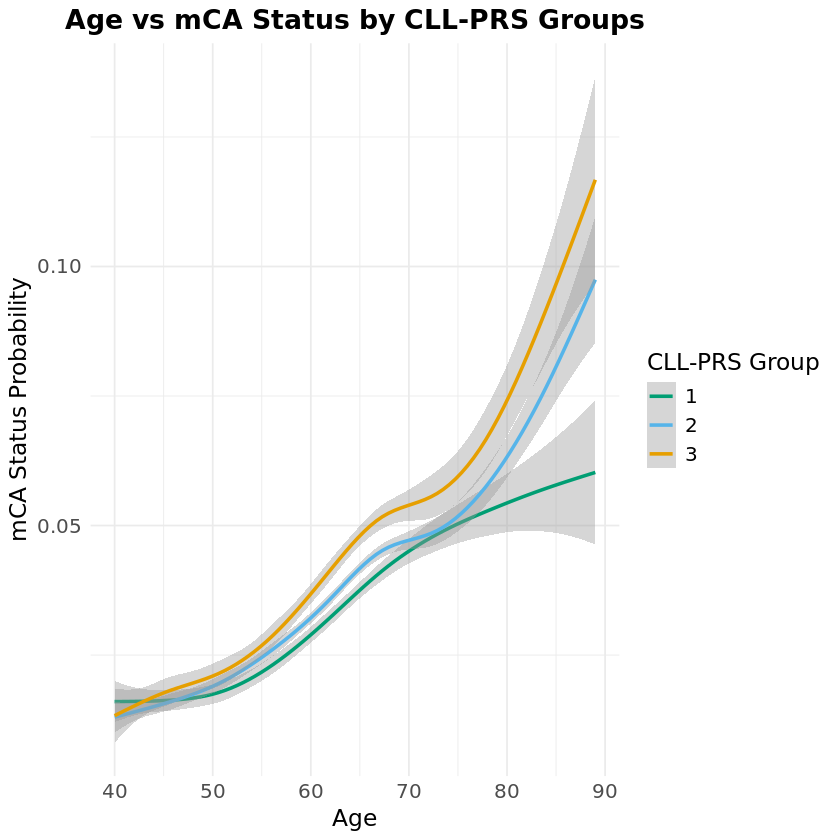

In [10]:
library(ggplot2)
ggplot(mCA_clean_A_U, aes(x = age, y = mca_auto, color = cll_262_coh)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) +
  scale_color_manual(values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00")) +
  labs(
    title = "Age vs mCA Status by CLL-PRS Groups",
    x = "Age",
    y = "mCA Status Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [11]:
mCA_clean_A_U$cll_262 <- 2
mCA_clean_A_U$cll_262[mCA_clean_A_U$cll_prs >= quantile(mCA_clean_A_U$cll_prs,0.8)] <- 3
mCA_clean_A_U$cll_262[mCA_clean_A_U$cll_prs < quantile(mCA_clean_A_U$cll_prs,0.2)] <- 1
mCA_clean_A_U$cll_262<-as.factor(mCA_clean_A_U$cll_262)
table(mCA_clean_A_U$cll_262)


     1      2      3 
117974 353919 117974 

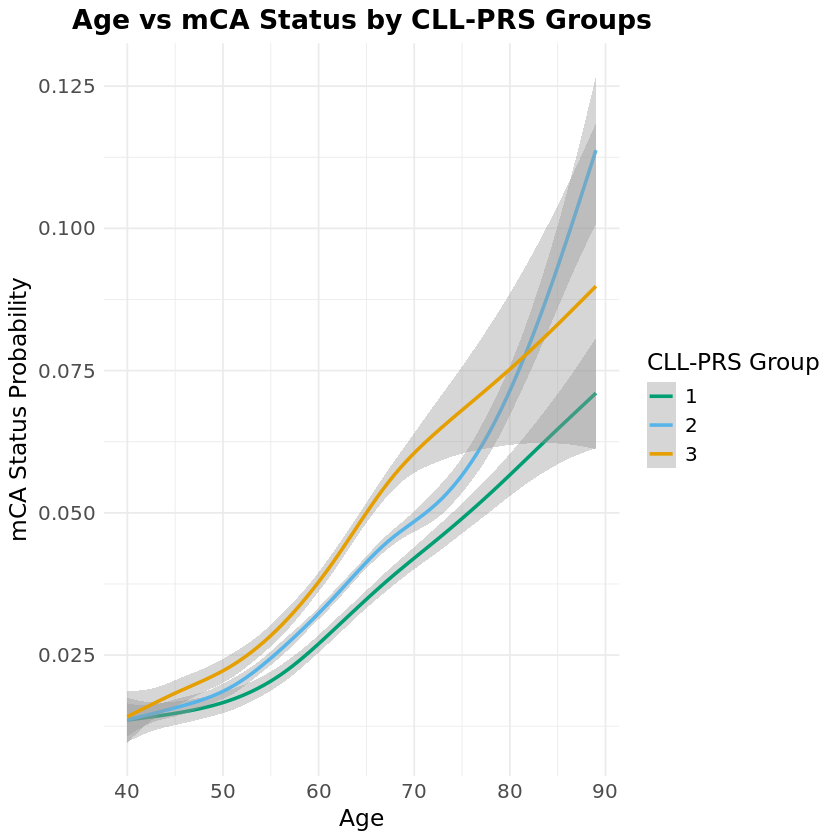

In [12]:
ggplot(mCA_clean_A_U, aes(x = age, y = mca_auto, color = cll_262)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) +
  scale_color_manual(values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00")) +
  labs(
    title = "Age vs mCA Status by CLL-PRS Groups",
    x = "Age",
    y = "mCA Status Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [13]:
#mCA and LTL_PRS
model.m <- glm(mca_auto ~ ltl_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.m)


Call:
glm(formula = mca_auto ~ ltl_prs + age + age_squ + sex_at_birth + 
    smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -6.945e+00  2.502e-01 -27.755  < 2e-16 ***
ltl_prs               -2.221e+00  2.435e-01  -9.120  < 2e-16 ***
age                    6.619e-02  8.358e-03   7.920 2.37e-15 ***
age_squ               -1.480e-04  6.927e-05  -2.137   0.0326 *  
sex_at_birthIntersex  -6.990e+00  3.021e+01  -0.231   0.8170    
sex_at_birthMale       1.479e-01  1.529e-02   9.671  < 2e-16 ***
smokingPMI: Dont Know  1.298e-01  1.740e-01   0.746   0.4557    
smokingYes             7.792e-02  1.572e-02   4.956 7.18e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 160633  on 583876  degrees of freedom
Residual deviance: 157531  on 583869  degrees of freedom
  (5990 observations deleted due

In [14]:
model.y <- glm(cll ~ mca_auto + ltl_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.y)


Call:
glm(formula = cll ~ mca_auto + ltl_prs + age + age_squ + sex_at_birth + 
    smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.807e+01  1.342e+00 -13.469  < 2e-16 ***
mca_auto               3.050e+00  7.280e-02  41.891  < 2e-16 ***
ltl_prs                1.757e+01  9.378e-01  18.736  < 2e-16 ***
age                    2.747e-01  4.064e-02   6.758 1.40e-11 ***
age_squ               -1.685e-03  3.067e-04  -5.493 3.94e-08 ***
sex_at_birthIntersex  -7.110e+00  1.339e+02  -0.053    0.958    
sex_at_birthMale       4.962e-01  7.312e-02   6.786 1.15e-11 ***
smokingPMI: Dont Know -1.274e-01  5.143e-01  -0.248    0.804    
smokingYes            -3.937e-02  7.286e-02  -0.540    0.589    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12292.3  on 583876  degrees of freedom
Residual deviance

In [15]:
med.out <- mediate(model.m, model.y, treat = "ltl_prs", mediator = "mca_auto", robustSE = TRUE, sims = 100)
summary(med.out)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                          Estimate 95% CI Lower 95% CI Upper p-value    
ACME (control)           -3.66e-04    -4.18e-04            0  <2e-16 ***
ACME (treated)           -2.05e-06    -6.64e-06            0  <2e-16 ***
ADE (control)             9.99e-01     9.99e-01            1  <2e-16 ***
ADE (treated)             9.99e-01     9.99e-01            1  <2e-16 ***
Total Effect              9.99e-01     9.99e-01            1  <2e-16 ***
Prop. Mediated (control) -3.65e-04    -4.18e-04            0  <2e-16 ***
Prop. Mediated (treated) -1.60e-06    -6.64e-06            0  <2e-16 ***
ACME (average)           -1.84e-04    -2.10e-04            0  <2e-16 ***
ADE (average)             9.99e-01     9.99e-01            1  <2e-16 ***
Prop. Mediated (average) -1.84e-04    -2.10e-04            0  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 583877 


Simulations: 100 


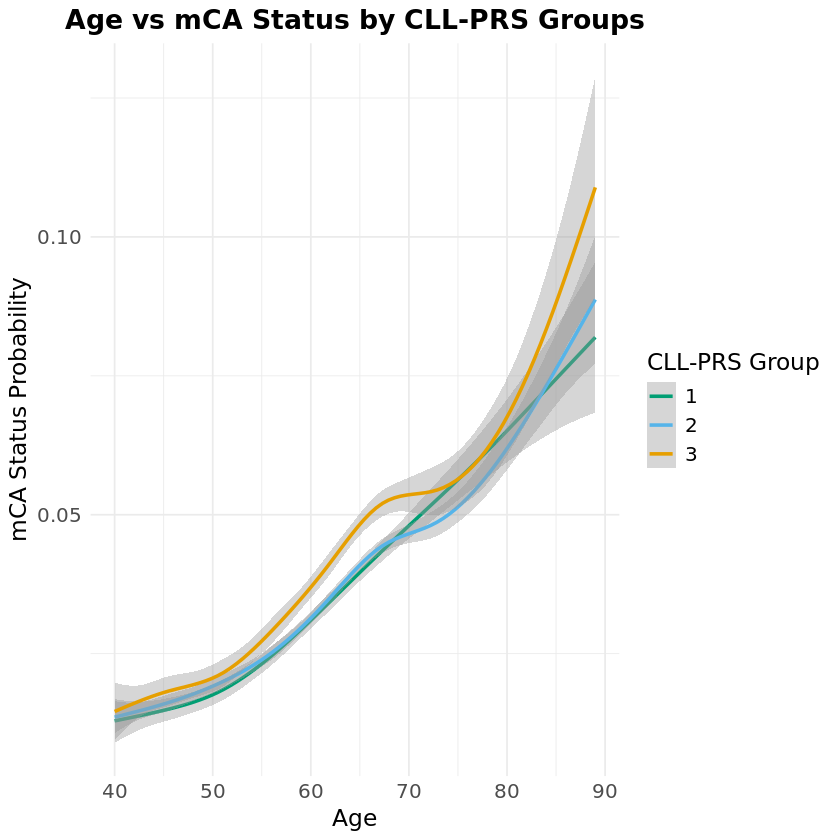

In [16]:
ggplot(mCA_clean_A_U, aes(x = age, y = mca_auto, color = ltl_262_coh)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) +
  scale_color_manual(values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00")) +
  labs(
    title = "Age vs mCA Status by CLL-PRS Groups",
    x = "Age",
    y = "mCA Status Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [18]:
#High risk 
table(mCA_clean_A_U$mca_highrisk)
mCA_clean_A_U <- filter(mCA_clean_A_U,mCA_clean_A_U$mca_highrisk==0 | mCA_clean_A_U$mca_highrisk==1)
mCA_clean_A_U <- mCA_clean_A_U %>%
  mutate(mca_highrisk = ifelse(mca_highrisk == 2, NA, mca_highrisk)) 
table(mCA_clean_A_U$mca_highrisk)


     0      1      2 
566090   2541  21236 


     1      2 
566090   2541 

In [19]:
mCA_clean_A_U$mca_highrisk <- ifelse(mCA_clean_A_U$mca_highrisk ==1, 0, mCA_clean_A_U$mca_highrisk)
mCA_clean_A_U$mca_highrisk <- ifelse(mCA_clean_A_U$mca_highrisk ==2, 1, mCA_clean_A_U$mca_highrisk)
table(mCA_clean_A_U$mca_highrisk)


     0      1 
566090   2541 

In [20]:
model.m <- glm(mca_highrisk ~ cll_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.m)


Call:
glm(formula = mca_highrisk ~ cll_prs + age + age_squ + sex_at_birth + 
    smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.249e+01  6.334e-01 -19.713  < 2e-16 ***
cll_prs                1.566e+00  1.013e-01  15.454  < 2e-16 ***
age                    7.041e-02  2.012e-02   3.500 0.000464 ***
age_squ                9.531e-05  1.571e-04   0.607 0.543959    
sex_at_birthIntersex  -6.732e+00  8.653e+01  -0.078 0.937981    
sex_at_birthMale       3.850e-01  4.055e-02   9.495  < 2e-16 ***
smokingPMI: Dont Know  3.677e-01  3.834e-01   0.959 0.337532    
smokingYes            -1.743e-02  4.122e-02  -0.423 0.672416    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 32203  on 562969  degrees of freedom
Residual deviance: 30777  on 562962  degrees of freedom
  (5661 observations deleted d

In [21]:
model.y <- glm(cll ~ mca_highrisk + cll_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.y)


Call:
glm(formula = cll ~ mca_highrisk + cll_prs + age + age_squ + 
    sex_at_birth + smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.102e+01  1.255e+00  -8.778  < 2e-16 ***
mca_highrisk           4.706e+00  8.227e-02  57.199  < 2e-16 ***
cll_prs                6.968e-01  1.938e-01   3.596 0.000323 ***
age                   -2.478e-03  3.824e-02  -0.065 0.948326    
age_squ                7.648e-04  2.854e-04   2.680 0.007360 ** 
sex_at_birthIntersex  -6.176e+00  1.425e+02  -0.043 0.965428    
sex_at_birthMale       4.282e-01  7.905e-02   5.417 6.07e-08 ***
smokingPMI: Dont Know  4.088e-01  5.577e-01   0.733 0.463582    
smokingYes            -2.501e-01  7.857e-02  -3.184 0.001455 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11125.1  on 562969  degrees of freedom
Residual devi

In [22]:
med.out <- mediate(model.m, model.y, treat = "cll_prs", mediator = "mca_highrisk", robustSE = TRUE, sims = 100)
summary(med.out)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                         Estimate 95% CI Lower 95% CI Upper p-value    
ACME (control)           9.94e-05     5.82e-05         0.00  <2e-16 ***
ACME (treated)           1.73e-04     1.36e-04         0.00  <2e-16 ***
ADE (control)            3.00e-04     2.18e-04         0.00  <2e-16 ***
ADE (treated)            3.74e-04     2.69e-04         0.00  <2e-16 ***
Total Effect             4.73e-04     4.03e-04         0.00  <2e-16 ***
Prop. Mediated (control) 1.99e-01     1.23e-01         0.36  <2e-16 ***
Prop. Mediated (treated) 3.61e-01     2.91e-01         0.48  <2e-16 ***
ACME (average)           1.36e-04     9.79e-05         0.00  <2e-16 ***
ADE (average)            3.37e-04     2.44e-04         0.00  <2e-16 ***
Prop. Mediated (average) 2.80e-01     2.06e-01         0.42  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 562970 


Simulations: 100 


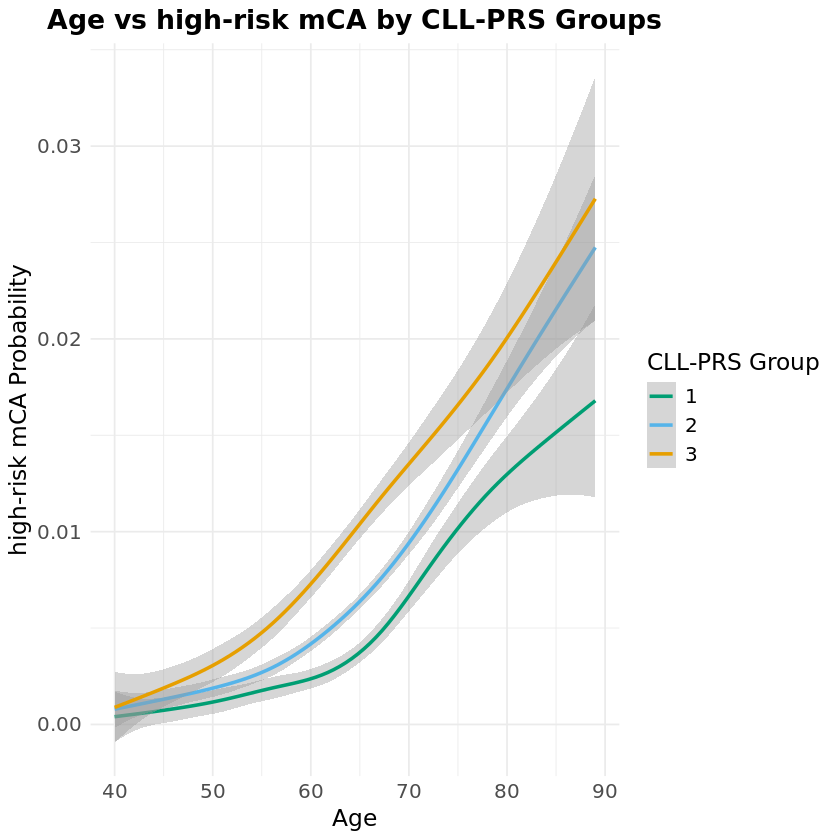

In [23]:
ggplot(mCA_clean_A_U, aes(x = age, y = mca_highrisk, color = cll_262_coh)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) +
  scale_color_manual(values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00")) +
  labs(
    title = "Age vs high-risk mCA by CLL-PRS Groups",
    x = "Age",
    y = "high-risk mCA Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [24]:
#LTL-PRS
model.m <- glm(mca_highrisk ~ ltl_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.m)


Call:
glm(formula = mca_highrisk ~ ltl_prs + age + age_squ + sex_at_birth + 
    smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.302e+01  7.176e-01 -18.145  < 2e-16 ***
ltl_prs                2.837e+00  5.977e-01   4.747 2.07e-06 ***
age                    1.719e-01  2.295e-02   7.488 7.01e-14 ***
age_squ               -8.018e-04  1.830e-04  -4.382 1.17e-05 ***
sex_at_birthIntersex  -7.141e+00  8.684e+01  -0.082    0.934    
sex_at_birthMale       3.985e-01  4.054e-02   9.828  < 2e-16 ***
smokingPMI: Dont Know  1.644e-01  3.827e-01   0.430    0.667    
smokingYes             2.825e-02  4.140e-02   0.682    0.495    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 32203  on 562969  degrees of freedom
Residual deviance: 30994  on 562962  degrees of freedom
  (5661 observations deleted d

In [25]:
model.y <- glm(cll ~ mca_highrisk + ltl_prs + age + age_squ+ sex_at_birth+ smoking, 
               data = mCA_clean_A_U, family = binomial)
summary(model.y)


Call:
glm(formula = cll ~ mca_highrisk + ltl_prs + age + age_squ + 
    sex_at_birth + smoking, family = binomial, data = mCA_clean_A_U)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.762e+01  1.487e+00 -11.848  < 2e-16 ***
mca_highrisk           4.732e+00  8.293e-02  57.066  < 2e-16 ***
ltl_prs                1.693e+01  1.032e+00  16.410  < 2e-16 ***
age                    2.593e-01  4.543e-02   5.708 1.15e-08 ***
age_squ               -1.543e-03  3.457e-04  -4.464 8.05e-06 ***
sex_at_birthIntersex  -7.015e+00  1.433e+02  -0.049    0.961    
sex_at_birthMale       4.845e-01  7.956e-02   6.090 1.13e-09 ***
smokingPMI: Dont Know -2.192e-02  5.486e-01  -0.040    0.968    
smokingYes            -6.471e-02  7.974e-02  -0.812    0.417    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11125.1  on 562969  degrees of freedom
Residual devi

In [26]:
med.out <- mediate(model.m, model.y, treat = "ltl_prs", mediator = "mca_highrisk", robustSE = TRUE, sims = 100)
summary(med.out)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                         Estimate 95% CI Lower 95% CI Upper p-value    
ACME (control)           5.27e-03     1.50e-03         0.01  <2e-16 ***
ACME (treated)           1.07e-05     3.54e-07         0.00  <2e-16 ***
ADE (control)            9.99e-01     9.98e-01         1.00  <2e-16 ***
ADE (treated)            9.94e-01     9.88e-01         1.00  <2e-16 ***
Total Effect             9.99e-01     9.98e-01         1.00  <2e-16 ***
Prop. Mediated (control) 4.92e-03     1.50e-03         0.01  <2e-16 ***
Prop. Mediated (treated) 6.25e-06     3.54e-07         0.00  <2e-16 ***
ACME (average)           2.64e-03     7.51e-04         0.01  <2e-16 ***
ADE (average)            9.96e-01     9.93e-01         1.00  <2e-16 ***
Prop. Mediated (average) 2.46e-03     7.52e-04         0.01  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 562970 


Simulations: 100 


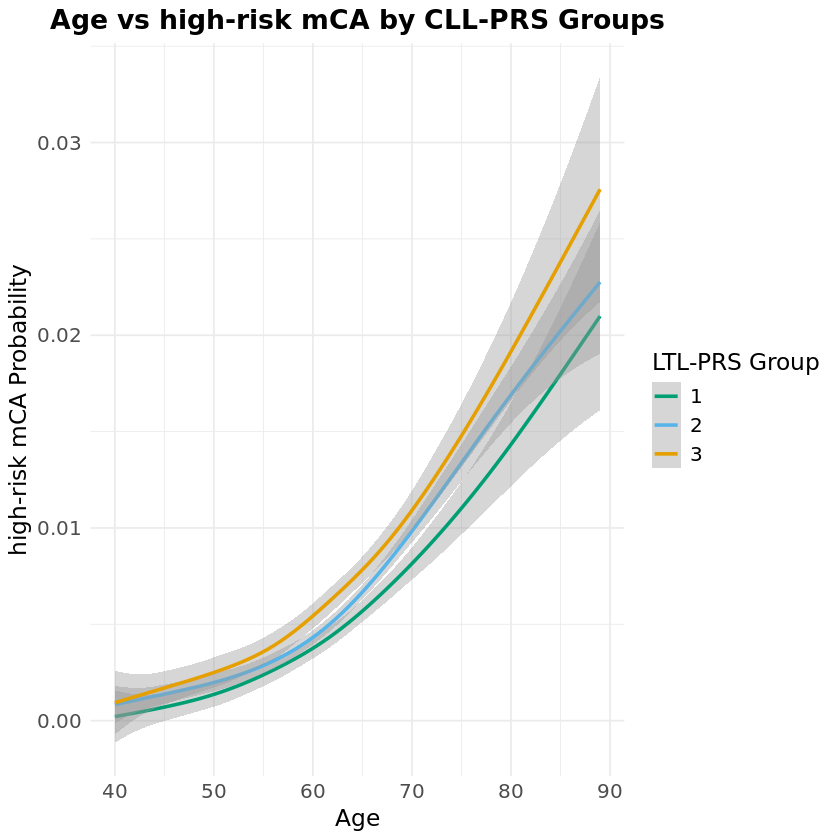

In [27]:
ggplot(mCA_clean_A_U, aes(x = age, y = mca_highrisk, color = ltl_262_coh)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) +
  scale_color_manual(values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00")) +
  labs(
    title = "Age vs high-risk mCA by CLL-PRS Groups",
    x = "Age",
    y = "high-risk mCA Probability",
    color = "LTL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [76]:
#age chart
mCA_clean_A_U$agegroup<-NA
mCA_clean_A_U$agegroup[mCA_clean_A_U$age<50] <-"1"
mCA_clean_A_U$agegroup[mCA_clean_A_U$age>=50 & mCA_clean_A_U$age<60] <-"2"
mCA_clean_A_U$agegroup[mCA_clean_A_U$age>=60 & mCA_clean_A_U$age<70] <-"3"
mCA_clean_A_U$agegroup[mCA_clean_A_U$age>=70 & mCA_clean_A_U$age<80] <-"4"
mCA_clean_A_U$agegroup[mCA_clean_A_U$age>=80] <-"5"
table(mCA_clean_A_U$agegroup,mCA_clean_A_U$mca_auto,useNA = "always")


      
            0      1   <NA>
  1    127840   2115      0
  2    181202   4546      0
  3    231833   9779      0
  4     25579   1305      0
  5      5247    421      0
  <NA>      0      0      0

In [95]:
rate_data <- mCA_clean_A_U %>% group_by (cohort, agegroup) %>% summarise (mca_rate = mean(mca_auto)) %>% ungroup
rate_data

`summarise()` has grouped output by 'cohort'. You can override using the
`.groups` argument.


cohort,agegroup,mca_rate
<chr>,<chr>,<dbl>
AoU,1,0.01027247
AoU,2,0.01646556
AoU,3,0.02869440
AoU,4,0.04832335
AoU,5,0.07427664
UKB,1,0.01711554
UKB,2,0.02565481
UKB,3,0.04232163
UKB,4,0.05083298


In [73]:
table(mCA_clean_A_U$cohort, mCA_clean_A_U$agegroup)

test

     
           1      2      3      4      5
  AoU  15965  23868  32759  24543   5668
  UKB 113990 161880 208853   2341      0

In [104]:
mCA_clean_A_U$mca_cf10 <- NA
mCA_clean_A_U$mca_cf10 <- ifelse(mCA_clean_A_U$mca_auto ==1 & mCA_clean_A_U$cf_max>=0.2 ,1,0)
mCA_clean_A_U$mca_cf10 <- ifelse(is.na(mCA_clean_A_U$mca_cf10),0,mCA_clean_A_U$mca_cf10 )
table(mCA_clean_A_U$mca_cf10, useNA= "always")
table(mCA_clean_A_U$mca_auto, useNA= "always")


     0      1   <NA> 
586618   3249      0 


     0      1   <NA> 
571701  18166      0 

In [105]:
mCA_clean_A_U$mca_cf10 <- as.numeric(mCA_clean_A_U$mca_cf10)

rate_data2 <- mCA_clean_A_U %>% group_by (cohort, agegroup) %>% summarise (mca_rate = mean(mca_cf10), .groups = "drop")
rate_data2

cohort,agegroup,mca_rate
<chr>,<chr>,<dbl>
AoU,1,0.001816474
AoU,2,0.002681414
AoU,3,0.006196770
AoU,4,0.012264189
AoU,5,0.025229358
UKB,1,0.002552856
UKB,2,0.004052384
UKB,3,0.007402336
UKB,4,0.006834686


In [69]:
age_rate <- read.csv("age_rate_4cohorts.csv")
age_rate

cohort,agegroup,mca_rate
<chr>,<chr>,<dbl>
TOPMed,40-50,0.0161
TOPMed,50-60,0.0284
TOPMed,60-70,0.0442
TOPMed,70-80,0.0712
TOPMed,80-90,0.1078
UKB,40-50,0.0171
UKB,50-60,0.0257
UKB,60-70,0.0423
UKB,70-80,0.0508


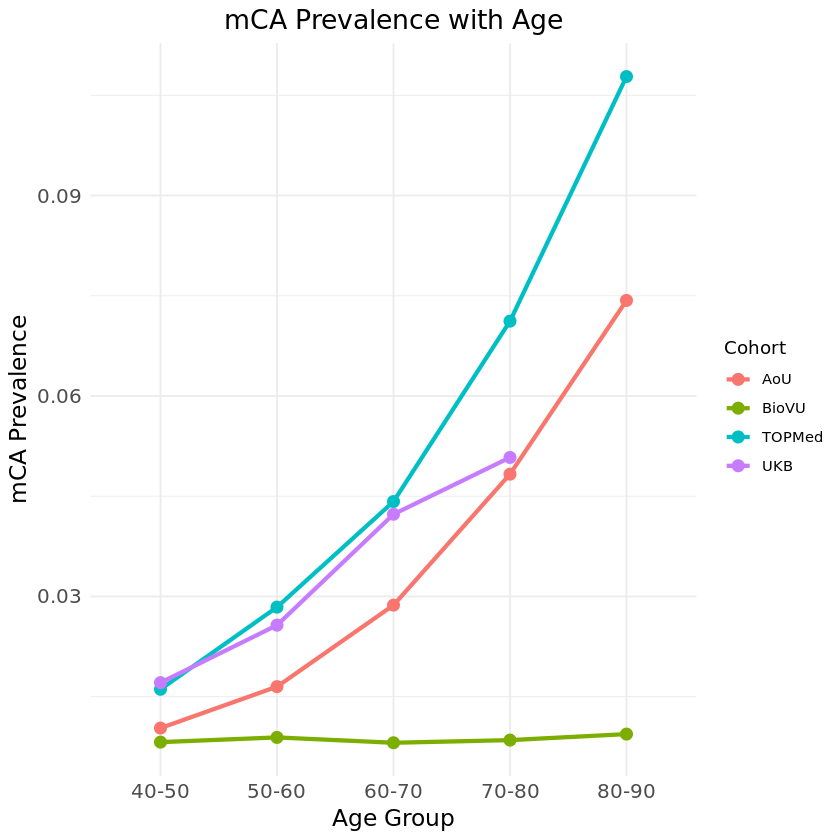

In [72]:
ggplot(age_rate, aes(x = agegroup, y = mca_rate, color = cohort, group = cohort)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) +
  labs(
    title = "mCA Prevalence with Age",
    x = "Age Group",
    y = "mCA Prevalence",
    color = "Cohort"
  ) +
  theme_minimal() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right"
  )

In [106]:
#Age, mCA and ancestry
#Load TOPMed
system("gsutil cp gs://fc-secure-cb192ac6-30ba-46b9-92ee-896a6e36c63e/kun/topmed_mCA2.Rdata .")

In [107]:
b<-load("topmed_mCA2.Rdata")
b

[1] "topmed_mCA2"

In [146]:
table(topmed_mCA2$ancestry)


  AFR   AMR   EAS   EUR   SAS 
18459  1109  1913 47161   302 

In [112]:
ls(topmed_mCA2)
ls(UKB_mCA_clean2)

[1] "AgeAtBloodDraw"  "ancestry"        "ancestry2"       "baf_conc"       
 [5] "bdev"            "bdev_se"         "beg_GRCh38"      "cf"             
 [9] "cf_cat"          "cf_max"          "chrom"           "computed_gender"
[13] "end_GRCh38"      "length"          "lod_baf_conc"    "lod_baf_phase"  
[17] "lod_lrr_baf"     "mca_auto"        "mca_highrisk"    "mca_status"     
[21] "n_flips"         "n_hets"          "n_sites"         "n50_hets"       
[25] "p_arm"           "q_arm"           "rel_cov"         "rel_cov_se"     
[29] "sample"          "sex"             "type"

[1] "age"          "age_squ"      "cf_cat"       "cf_max"       "chrom"       
 [6] "cll"          "cll_262_coh"  "cll_prs"      "cohort"       "ltl_262_coh" 
[11] "ltl_prs"      "mca_auto"     "mca_highrisk" "p_arm"        "person_id"   
[16] "q_arm"        "sex_at_birth" "smoking"      "type"

In [147]:
topmed_clean <- topmed_mCA2[,c("AgeAtBloodDraw","cf_cat","cf_max","chrom","mca_auto","mca_highrisk","p_arm","sample",
                              "q_arm","sex","type","ancestry")]
head(topmed_clean)

AgeAtBloodDraw,cf_cat,cf_max,chrom,mca_auto,mca_highrisk,p_arm,sample,q_arm,sex,type,ancestry
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
57.00,NA,NA,NA,0,0,NA,NWD100018,NA,M,NA,EUR
55.00,NA,NA,NA,0,0,NA,NWD100028,NA,M,NA,EUR
51.00,NA,NA,NA,0,0,NA,NWD100045,NA,F,NA,EUR
42.11,NA,NA,NA,0,0,NA,NWD100047,NA,F,NA,EUR
63.00,NA,NA,NA,0,0,NA,NWD100048,NA,M,NA,EUR
67.00,NA,NA,NA,0,0,NA,NWD100057,NA,M,NA,EUR


In [148]:
names(topmed_clean)[1]<-"age"
names(topmed_clean)[8]<-"person_id"
names(topmed_clean)[10]<-"sex_at_birth"
names(topmed_clean)[12]<-"ancestry"
topmed_clean$cohort <- "TOPMed"
topmed_clean$age_squ <- topmed_clean$age * topmed_clean$age

In [150]:
table(topmed_clean$ancestry)
topmed_clean$smoking <- NA
topmed_clean$cll <- NA
ls(topmed_clean)


  AFR   AMR   EAS   EUR   SAS 
18459  1109  1913 47161   302 

[1] "age"          "age_squ"      "ancestry"     "cf_cat"       "cf_max"      
 [6] "chrom"        "cll"          "cohort"       "mca_auto"     "mca_highrisk"
[11] "p_arm"        "person_id"    "q_arm"        "sex_at_birth" "smoking"     
[16] "type"

In [160]:
#UKB
UKB_clean <- UKB_mCA_clean[,c("ID_VUMC", "baseline_age", "age2", "genetic_sex","eversmoked_0",
                             "mca_status", "cf_cat", "cf_max","chrom", "mca_highrisk",
                             "p_arm","q_arm","type","cll")]
names(UKB_clean)[1] <- "person_id"
names(UKB_clean)[2] <- "age"
names(UKB_clean)[3] <- "age_squ"
names(UKB_clean)[4] <- "sex_at_birth"
names(UKB_clean)[5] <- "smoking"
names(UKB_clean)[6] <- "mca_auto"
UKB_clean$ancestry <-"eur"
UKB_clean$cohort <-"UKB"
ls(UKB_clean)
dim(UKB_clean)

[1] "age"          "age_squ"      "ancestry"     "cf_cat"       "cf_max"      
 [6] "chrom"        "cll"          "cohort"       "mca_auto"     "mca_highrisk"
[11] "p_arm"        "person_id"    "q_arm"        "sex_at_birth" "smoking"     
[16] "type"

[1] 502413     16

In [128]:
#AoU
table(data_all_pheno_cox$ancestry_pred,useNA = "always")
AoU_clean <- filter(data_all_pheno_cox,data_all_pheno_cox$age>=40 & data_all_pheno_cox$age<=90)
summary(AoU_clean$age)


   afr    amr    eas    eur    mid    sas   <NA> 
 56911  45034   5706 133578    942   3217  67537 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.79   60.34   60.46   68.74   89.99 

In [129]:
AoU_clean$mca_auto <- AoU_clean$mca_status
AoU_clean$mca_auto <- ifelse(AoU_clean$chrom == "chrX" & AoU_clean$mca_status == "1" , 0 ,AoU_clean$mca_auto)
table(AoU_clean$mca_auto)
table(AoU_clean$mca_status)


     0      1 
217587   5263 


     0      1 
209309  13541 

In [139]:
AoU_clean <- AoU_clean[,c("person_id", "age", "age_squ", "sex_at_birth", "smoking","ancestry_pred", "mca_auto", "cf_cat", "cf_max","chrom", "mca_highrisk",
                                       "p_arm","q_arm","type","cll")]

In [140]:
names(AoU_clean)[6] <- "ancestry"
AoU_clean$cohort <- "AoU"
ls(AoU_clean)

[1] "age"          "age_squ"      "ancestry"     "cf_cat"       "cf_max"      
 [6] "chrom"        "cll"          "cohort"       "mca_auto"     "mca_highrisk"
[11] "p_arm"        "person_id"    "q_arm"        "sex_at_birth" "smoking"     
[16] "type"

In [161]:
data_A_U <- rbind(UKB_clean, AoU_clean)
table(data_A_U$ancestry)


   afr    amr    eas    eur    mid    sas 
 40582  25997   3020 605216    506   1506 

In [169]:
topmed_clean$ancestry <- tolower(topmed_clean$ancestry)
data_A_U_T <- rbind(data_A_U, topmed_clean)
table(data_A_U_T$ancestry)
table(data_A_U_T$smoking)


   afr    amr    eas    eur    mid    sas 
 59041  27106   4933 652377    506   1808 


             0              1             No PMI: Dont Know            Yes 
        200814         298715         119706           2376          96446 

In [163]:
dim(UKB_clean)
dim(AoU_clean)
dim(topmed_clean)

[1] 502413     16

[1] 222850     16

[1] 69105    16

In [181]:
#BioVU
d <- load("Users_Kun_Zhao_BioVU_all_40_90.Rdata")
d

[1] "BioVU_all"

In [183]:
ls(BioVU_all)

[1] "age"                  "agegroup"             "ancestry"            
 [4] "arm"                  "baf_conc"             "bdev"                
 [7] "bdev_se"              "beg_GRCh37"           "birthDate"           
[10] "cf"                   "cf_cat"               "cf_max"              
[13] "cf_max100"            "chr_type"             "chrom"               
[16] "cll"                  "cohort"               "computed_gender.x"   
[19] "computed_gender.y"    "deathDate"            "DNADate"             
[22] "end_GRCh37"           "Ethnicity"            "first_phecode_date"  
[25] "isDead"               "lastRecordDate"       "length"              
[28] "lod_baf_conc"         "lod_baf_phase"        "lod_lrr_baf"         
[31] "mac_high.x"           "mac_high.y"           "mca_auto"            
[34] "mca_status"           "n_flips"              "n_hets"              
[37] "n_sites"              "n50_hets"             "ourSid"              
[40] "p_arm"                "p_count"              "q_arm"               
[43] "q_count"              "Race"                 "race2"               
[46] "rel_cov"              "rel_cov_se"           "SmokingStatus"       
[49] "SmokingStatus2"       "type"                 "YAgeAtDNA"           
[52] "YAgeAtLastRecORDeath"

In [184]:
table(BioVU_all$cll,useNA = "always")


    0     1  <NA> 
56221   221     0 

In [186]:
BioVU_clean <- BioVU_all[,c("ourSid", "age", "computed_gender.x", "SmokingStatus","Race", "mca_auto", "cf_cat", "cf_max","chrom", "mac_high.y",
                              "p_arm","q_arm","type","cll")]

In [187]:
names(BioVU_clean)[1] <- "person_id"
names(BioVU_clean)[3] <- "sex_at_birth"
names(BioVU_clean)[4] <- "smoking"
names(BioVU_clean)[5] <- "ancestry"
names(BioVU_clean)[10] <- "mca_highrisk"

In [189]:
BioVU_clean$cohort<-"BioVU"
BioVU_clean$age_squ<-BioVU_clean$age * BioVU_clean$age
dim(BioVU_clean)

[1] 56442    16

In [191]:
table(BioVU_clean$ancestry)
BioVU_clean$ancestry<- ifelse(BioVU_clean$ancestry == "W", "eur",BioVU_clean$ancestry)
BioVU_clean$ancestry<- ifelse(BioVU_clean$ancestry == "B", "afr",BioVU_clean$ancestry)
BioVU_clean$ancestry<- ifelse(BioVU_clean$ancestry == "A", "eas",BioVU_clean$ancestry)
table(BioVU_clean$ancestry)


    A     B     I     U     W 
  436  6930    76  3550 45450 


  afr   eas   eur     I     U 
 6930   436 45450    76  3550 

In [219]:
data_B_A_U_T <- rbind(data_A_U_T, BioVU_clean)
dim(data_B_A_U_T)
table(data_B_A_U_T$cf_cat)

[1] 850810     16


     0      1      2 
697242  22023  10204 

In [233]:
data_B_A_U_T$cf_cat <- ifelse(is.na(data_B_A_U_T$cf_cat),0,data_B_A_U_T$cf_cat)
table(data_B_A_U_T$cf_cat,useNA = "always")


     0      1      2      3   <NA> 
121341 697242  22023  10204      0 

In [224]:
filtered_race <- data_B_A_U_T %>% filter(ancestry %in% c("eur", "eas", "afr"))
filtered_race$agegroup <- NA
filtered_race$agegroup[filtered_race$age<50] <-"1"
filtered_race$agegroup[filtered_race$age>=50 & filtered_race$age<60] <-"2"
filtered_race$agegroup[filtered_race$age>=60 & filtered_race$age<70] <-"3"
filtered_race$agegroup[filtered_race$age>=70 & filtered_race$age<80] <-"4"
filtered_race$agegroup[filtered_race$age>=80] <-"5"

filtered_race <- filtered_race %>%
  mutate(agegroup = factor(agegroup, levels = 1:5, labels = c("<50", "50-60", "60-70", "70-80", ">=80")))

rate_data <- filtered_race %>% group_by(agegroup, ancestry) %>% summarize(mca_rate = mean(mca_auto)) %>% ungroup()
rate_data <- filter(rate_data,rate_data$agegroup != "NA")
rate_data

`summarise()` has grouped output by 'agegroup'. You can override using the
`.groups` argument.


agegroup,ancestry,mca_rate
<fct>,<chr>,<dbl>
<50,afr,0.01487014
<50,eas,0.00968523
<50,eur,0.01630647
50-60,afr,0.02124966
50-60,eas,0.01186322
50-60,eur,0.02427964
60-70,afr,0.03246508
60-70,eas,0.02274882
60-70,eur,0.04015747


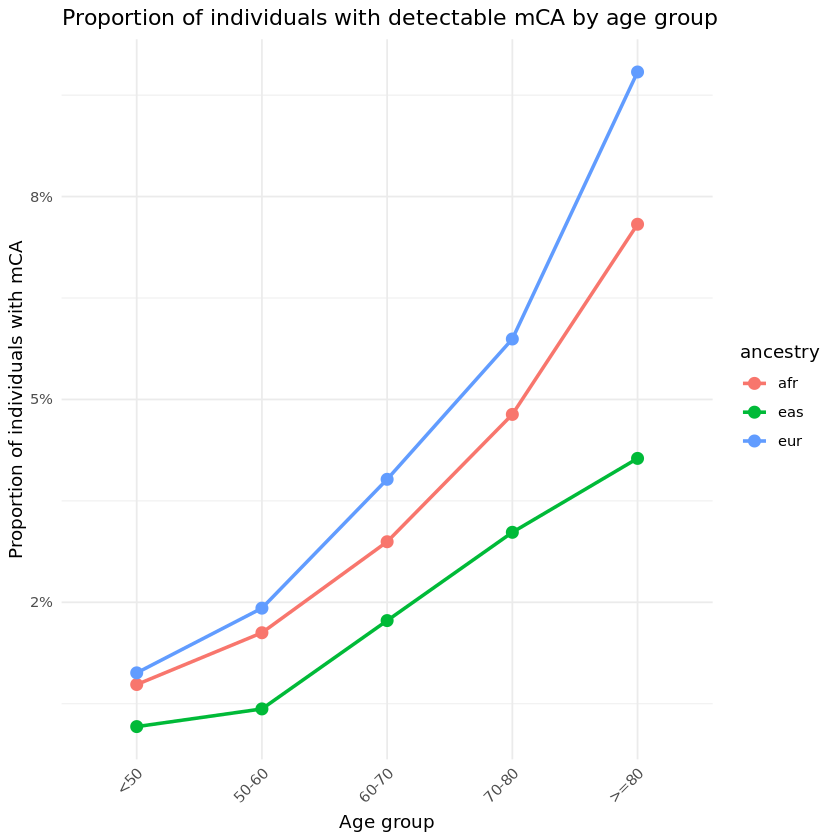

In [198]:
ggplot(rate_data, aes(x = agegroup, y = mca_rate, color = ancestry, group = ancestry)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(
    title = "Proportion of individuals with detectable mCA by age group",
    x = "Age group",
    y = "Proportion of individuals with mCA"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

In [226]:
filtered_race$cf_cat <- ifelse(is.na(filtered_race$cf_cat),0,filtered_race$cf_cat)
table(filtered_race$cf_cat,useNA = "always")


     0      1      2      3   <NA> 
116274 623659  19909   9325      0 

In [227]:
filtered_race$cf_cat <- ifelse(filtered_race$cf_cat==0,1,filtered_race$cf_cat)
table(filtered_race$cf_cat,useNA = "always")


     1      2      3   <NA> 
739933  19909   9325      0 

In [228]:
filtered_race <- filtered_race %>%
  mutate(cf_cat = factor(cf_cat, levels = c(1, 2, 3), labels = c("non-mCA", "small", "large (>=10%)")))
table(filtered_race$cf_cat,useNA = "always")


      non-mCA         small large (>=10%)          <NA> 
       739933         19909          9325             0 

In [231]:
df_summary <- filtered_race %>%
  group_by(ancestry, agegroup, cf_cat) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(ancestry, agegroup) %>%
  mutate(total = sum(count),
        mca_rate = count/total)

df_summary <- df_summary %>%
  filter(cf_cat != "non-mCA")
df_summary

ancestry,agegroup,cf_cat,count,total,mca_rate
<chr>,<fct>,<fct>,<int>,<int>,<dbl>
afr,<50,small,172,14862,0.011573140
afr,<50,large (>=10%),89,14862,0.005988427
afr,50-60,small,533,22118,0.024098020
afr,50-60,large (>=10%),159,22118,0.007188715
afr,60-70,small,788,15894,0.049578457
afr,60-70,large (>=10%),220,15894,0.013841701
afr,70-80,small,384,5420,0.070848708
afr,70-80,large (>=10%),191,5420,0.035239852
afr,>=80,small,78,894,0.087248322


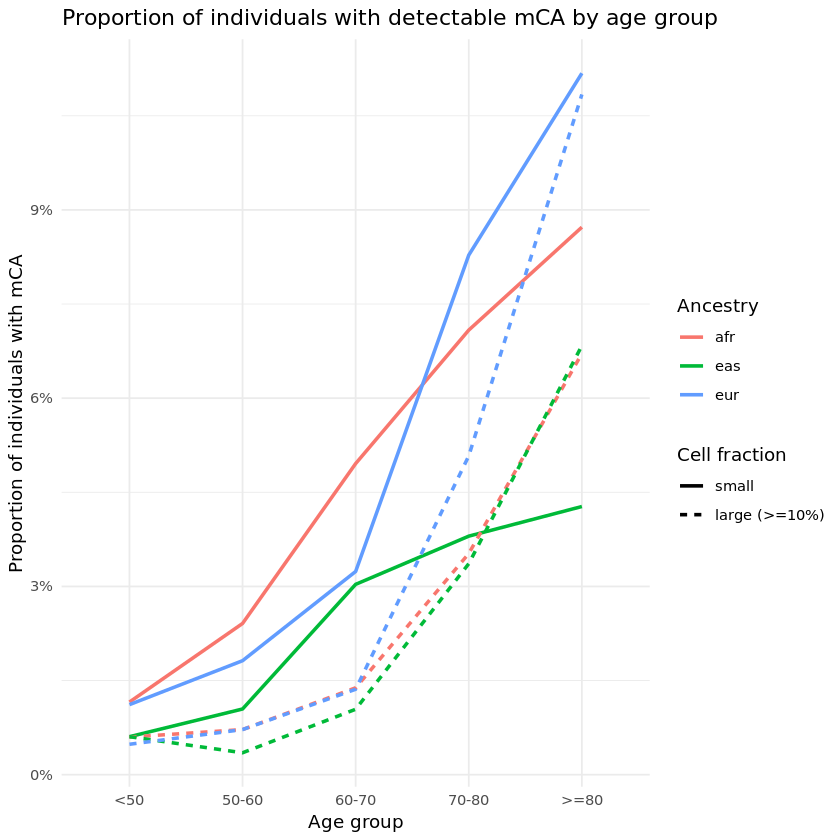

In [232]:
ggplot(df_summary, aes(x = agegroup, y = mca_rate, color = ancestry, linetype = cf_cat, group = interaction(ancestry, cf_cat))) +
  geom_line(size = 1) + scale_y_continuous(labels =scales::percent_format(accuracy = 1)) +
  labs(
    title = "Proportion of individuals with detectable mCA by age group",
    x = "Age group",
    y = "Proportion of individuals with mCA",
    color = "Ancestry",
    linetype = "Cell fraction"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right"
  )
